# Implementation of ANN using Keras:

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0
Keras Version 3.4.1


# GPU / CPU Check

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:

check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data

In [6]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [8]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [9]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [10]:
print(f"data type of y_train_full: {y_train_full.dtype},\n shape of y_train_full: {y_train_full.shape}")

data type of y_train_full: uint8,
 shape of y_train_full: (60000,)


In [11]:
len(X_test[1][0])

28

In [12]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [13]:
len(X_train_full[5000:] )

55000

In [14]:
len(X_train)

55000

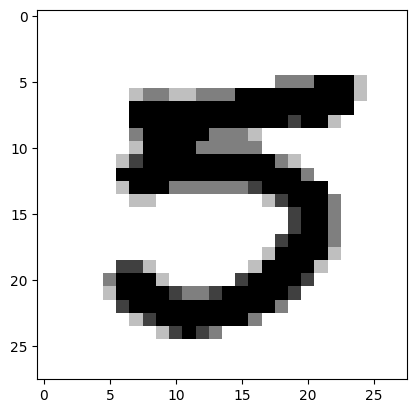

In [15]:
# Lets view some data
plt.imshow(X_train[5465], cmap="binary")
plt.show()

<Axes: >

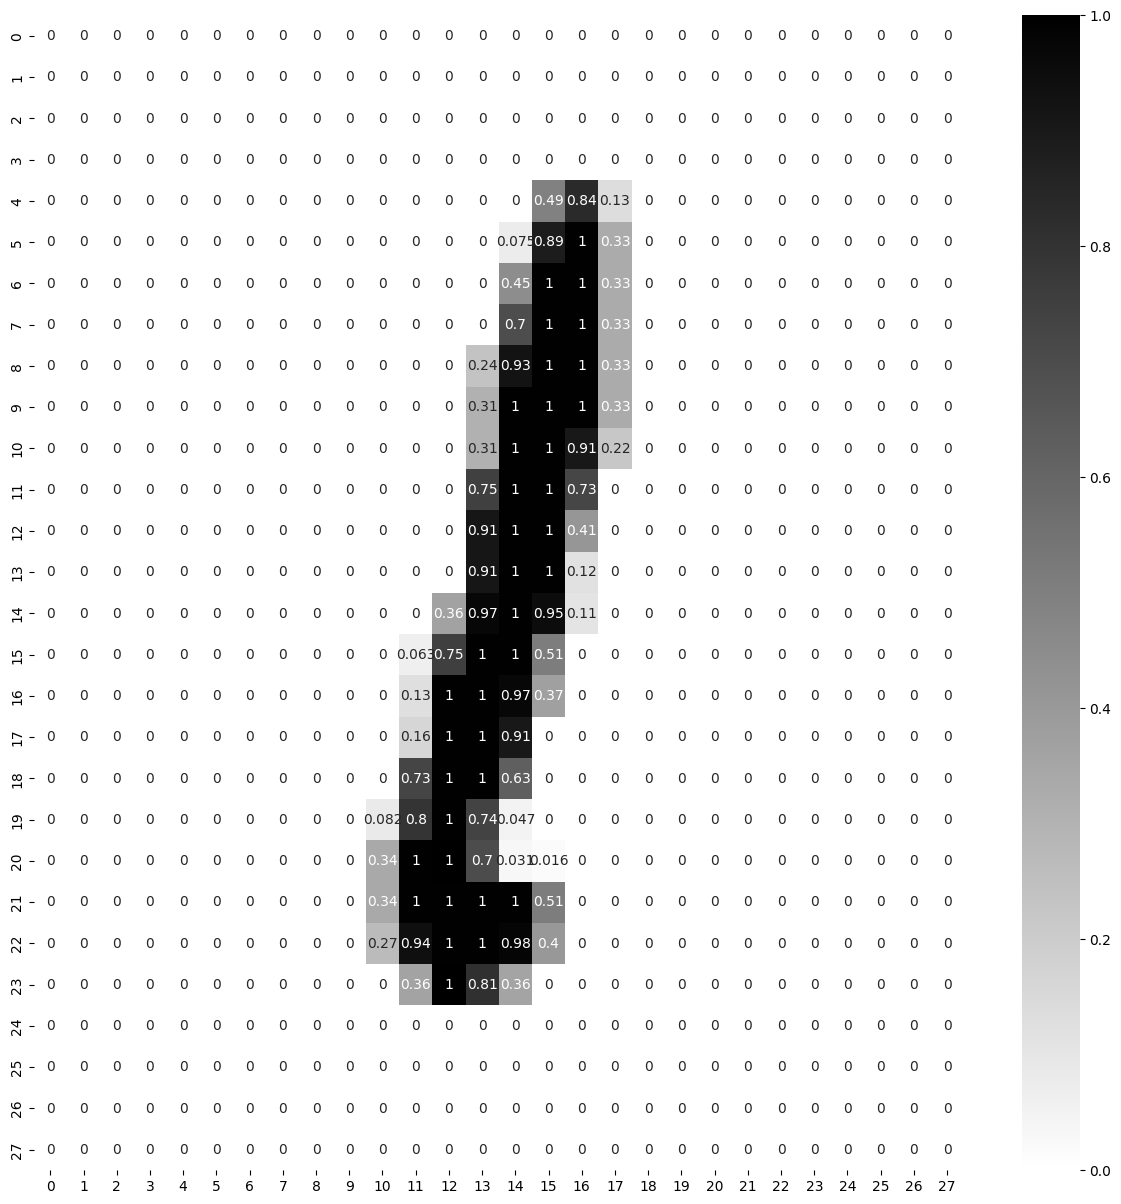

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[6], annot=True, cmap="binary")

In [18]:
# Architecture Used:
from IPython.display import Image

# Display the image from the URL
Image(url="https://1drv.ms/i/c/232348fc8f8daac7/EbbazZMYShlCnCnAh_zjcFAB1HcvtuW3GeeMgLcnjSotSw?e=dB6kOm")


In [24]:
# Method-1
import tensorflow as tf
from tensorflow.keras import regularizers
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1",kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [50]:
# Method-2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
# defining model
model_clf = Sequential()
model_clf.add(Flatten(input_shape=(28, 28)))
model_clf.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model_clf.add(BatchNormalization())
model_clf.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-4,l2=1e-5)))
model_clf.add(Dropout(0,2))
model_clf.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model_clf.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Dense name=dense_1, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_2, built=True>]

In [52]:
model_clf.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,306 (216.04 KB)

 Trainable params: 55,178 (215.54 KB)

 Non-trainable params: 128 (512.00 B)

In [53]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [54]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [55]:
hidden1 = model_clf.layers[1]
hidden1.name

'dense'

In [56]:
  len(hidden1.get_weights()[1]),len(hidden1.get_weights()[0])

(64, 784)

In [57]:
hidden1.get_weights()

[array([[-0.00626499,  0.02171497,  0.07493842, ..., -0.04196253,
         -0.05677357,  0.00870347],
        [-0.04051815, -0.03710164,  0.0256296 , ...,  0.0501901 ,
         -0.02025262,  0.06020104],
        [ 0.04542255,  0.03223801, -0.04956295, ..., -0.0510512 ,
          0.04686856, -0.0418771 ],
        ...,
        [-0.07695701,  0.05524897, -0.02031536, ..., -0.05841842,
          0.06018665, -0.08121354],
        [-0.03847595, -0.01030806,  0.04262001, ...,  0.01991205,
          0.04339453,  0.03557526],
        [ 0.05794505,  0.02414498,  0.08163951, ..., -0.07801169,
         -0.02337723,  0.07569615]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [58]:
weights, biases = hidden1.get_weights()

In [59]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 64) 



array([[-0.00626499,  0.02171497,  0.07493842, ..., -0.04196253,
        -0.05677357,  0.00870347],
       [-0.04051815, -0.03710164,  0.0256296 , ...,  0.0501901 ,
        -0.02025262,  0.06020104],
       [ 0.04542255,  0.03223801, -0.04956295, ..., -0.0510512 ,
         0.04686856, -0.0418771 ],
       ...,
       [-0.07695701,  0.05524897, -0.02031536, ..., -0.05841842,
         0.06018665, -0.08121354],
       [-0.03847595, -0.01030806,  0.04262001, ...,  0.01991205,
         0.04339453,  0.03557526],
       [ 0.05794505,  0.02414498,  0.08163951, ..., -0.07801169,
        -0.02337723,  0.07569615]], dtype=float32)

In [60]:
print("shape\n", biases.shape)

shape
 (64,)


In [61]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [72]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9617 - loss: 0.1864 - val_accuracy: 0.9682 - val_loss: 0.1697
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9657 - loss: 0.1721 - val_accuracy: 0.9696 - val_loss: 0.1628
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9697 - loss: 0.1618 - val_accuracy: 0.9696 - val_loss: 0.1606
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9709 - loss: 0.1539 - val_accuracy: 0.9712 - val_loss: 0.1545
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9731 - loss: 0.1447 - val_accuracy: 0.9702 - val_loss: 0.1532
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.1420 - val_accuracy: 0.9734 - val_loss: 0.1490
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.1330 - val_accuracy: 0.9750 - val_loss: 0.1460
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.1233 - 

In [63]:
history.params

{'verbose': 'auto', 'epochs': 5, 'steps': 1719}

In [64]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.859018,0.555129,0.9366,0.285416
1,0.928727,0.302605,0.9520,0.229097
2,0.944964,0.250478,0.9592,0.206161
3,0.952127,0.221320,0.9630,0.187014
4,0.958182,0.201275,0.9670,0.176085


<Axes: >

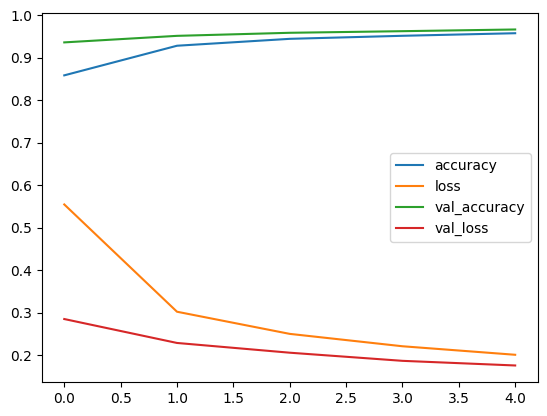

In [65]:
pd.DataFrame(history.history).plot()

In [66]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9559 - loss: 0.2033


[0.18185211718082428, 0.9632999897003174]

In [67]:
x_new = X_test[:3]
 #x_new

In [68]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [69]:
y_prob = model_clf.predict(x_new)
#y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [70]:
y_prob.round(3)

array([[0.   , 0.   , 0.001, 0.001, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ],
       [0.006, 0.004, 0.969, 0.003, 0.   , 0.008, 0.006, 0.   , 0.004,
        0.   ],
       [0.   , 0.994, 0.001, 0.   , 0.   , 0.001, 0.001, 0.001, 0.002,
        0.   ]], dtype=float32)

In [71]:
y_prob

array([[1.2604336e-04, 2.1779326e-05, 1.3439268e-03, 8.2177587e-04,
        1.2096008e-06, 6.6347762e-05, 1.6011156e-05, 9.9745232e-01,
        1.5698794e-05, 1.3487332e-04],
       [6.3184397e-03, 3.8636096e-03, 9.6941018e-01, 2.5580202e-03,
        1.6071966e-04, 7.6928302e-03, 5.7560233e-03, 2.0859861e-05,
        4.2073885e-03, 1.1881555e-05],
       [2.0976626e-05, 9.9356598e-01, 8.0290710e-04, 3.8424233e-04,
        1.7887392e-04, 1.0874750e-03, 5.8516720e-04, 1.4364189e-03,
        1.7810174e-03, 1.5691489e-04]], dtype=float32)

In [46]:
y_pred = np.argmax(y_prob, axis = 1)

In [47]:
y_pred

array([7, 2, 1])

In [48]:
actual

array([7, 2, 1], dtype=uint8)

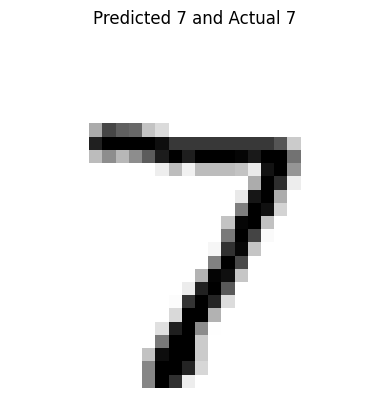

######################


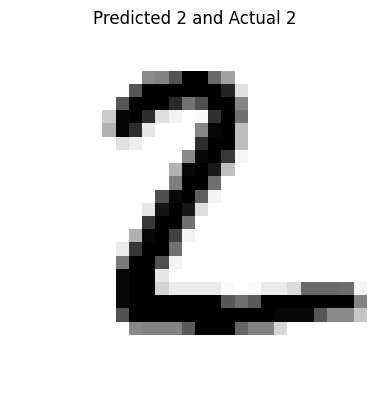

######################


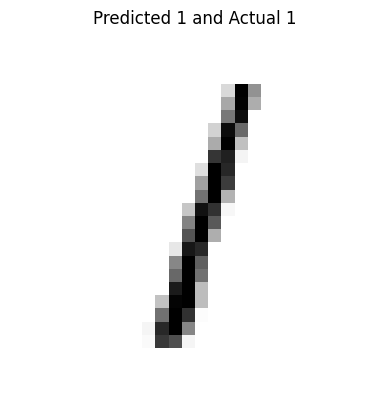

######################


In [49]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")